In [4]:
import os, json, glob, sys, time
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy.ndimage
from scipy import stats

sys.path.append('./pyusct/')
from rfdata import RFdata

%matplotlib inline

In [5]:
MOUNT_PATH = "/run/user/1000/gvfs/smb-share:server=azlab-fs01.local,share=東研究室/個人work/富井/"

In [6]:
MODEL_PATH = os.path.join(MOUNT_PATH, "PYUSCT_model/PCA/")
DATA_PATH = os.path.join(MOUNT_PATH, "PYUSCT_train/")

In [7]:
%ls $MODEL_PATH

PCA_model_full.pickle*
PCA_model_reduced_t100.pickle*
PCA_model_reduced_t100_r128.pickle*
PCA_model_reduced_t100_r64.pickle*
PCA_model_reduced_T4_t100_r64.pickle*
PCA_model_reduced_T8_t100_r64.pickle*
PCA_model_T16.pickle*
PCA_model_T16_random_sample_strong.pickle*
PCA_model_T16_random_sample_weak.pickle*
PCA_model_T32.pickle*


In [8]:
from sklearn.decomposition import PCA
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
import pickle

### Load data

In [9]:
# Strong dataset019
# Weak   dataset026
strong_dataset = os.path.join(DATA_PATH, "dataset019/")
weak_dataset = os.path.join(DATA_PATH, "dataset026/")

In [13]:
def evaluate(pca, dataset_path, test_size=10):
    
    data_list = glob.glob(os.path.join(dataset_path, "input/*.npy"))
    data_list.sort()
    
    size = test_size
    A = []
    for fname in np.random.choice(data_list, size):
        inf_from_every_file = np.load(fname)
        A.append(inf_from_every_file)
    A = np.concatenate(A)
    
    B = A[:size].reshape(size, -1)
    Bt = pca.transform(B)
    Btb = pca.inverse_transform(Bt)
    diff = np.abs(B - Btb)
    
    print(B[0,:5])
    print(Btb[0,:5])
    print(diff[0,:5])
    print(diff.max(), diff.min(), diff.mean())
    # print("KL = {}".format(scipy.stats.entropy(B, Btb)))
    # print("W distance = {}".format(scipy.stats.wasserstein_distance(B, Btb)))
    # evs = explained_variance_score(B, Btb, multioutput='raw_values')
    # r2 = r2_score(B, Btb, multioutput='raw_values')
    # MAE =  mean_absolute_error(B, Btb, multioutput='raw_values')
    # percent of MAE
    return B, Btb, np.divide(diff, B)

### Original model

In [11]:
pca = None
with open(os.path.join(MODEL_PATH, "PCA_model_T16.pickle"), 'rb') as handle:
    pca = pickle.load(handle)

/home/yuhui/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator PCA from version 0.18.1 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


#### score strong dataset by original model

In [14]:
B_so, Btb_so, res_so = evaluate(pca, strong_dataset)

[ 0.00063126  0.00062656  0.00062049  0.00061383  0.00060579]
[ 0.00089858  0.00095239  0.00099951  0.00104074  0.00107414]
[ 0.00026732  0.00032583  0.00037902  0.0004269   0.00046835]
0.165800534536 1.00798674312e-10 0.00200926300059


In [101]:
res_so = res_so.mean(axis=0)

In [102]:
stats.describe(res_so)

DescribeResult(nobs=819200, minmax=(0.14528642254161203, 2226.7567281134752), mean=1.8261695879970747, variance=65.913868089289437, skewness=38.27536744976831, kurtosis=7122.761068592471)

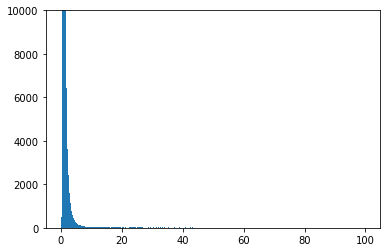

In [103]:
plt.hist(res_so, bins=[0.1*i for i in range(1000)])
plt.ylim(0, 10000)
plt.show()

#### score weak dataset by original model 

In [ ]:
res_wo = evaluate(pca, weak_dataset)

In [105]:
res_wo = res_wo.mean(axis=0)

In [107]:
stats.describe(res_wo)

DescribeResult(nobs=819200, minmax=(0.13257538343911179, 947.5160106798379), mean=1.5215747860522517, variance=5.9743261428547294, skewness=117.4111199412671, kurtosis=38874.38924406667)

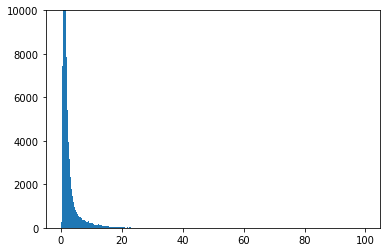

In [106]:
plt.hist(res_wo, bins=[0.1*i for i in range(1000)])
plt.ylim(0, 10000)
plt.show()

### Random-strong model

In [ ]:
pca = None
with open(os.path.join(MODEL_PATH, "PCA_model_T16_random_sample_strong.pickle"), 'rb') as handle:
    pca = pickle.load(handle)

#### score strong dataset by random-strong model 

In [ ]:
res_ss = evaluate(pca, strong_dataset)

#### score weak dataset by random-strong model 

In [ ]:
res_ws = evaluate(pca, weak_dataset)

### Random-weak model

In [69]:
pca = None
with open(os.path.join(MODEL_PATH, "PCA_model_T16_random_sample_weak.pickle"), 'rb') as handle:
    pca = pickle.load(handle)

/home/yuhui/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator PCA from version 0.18.1 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


#### score strong dataset by random-weak model 

In [ ]:
res_sw = evaluate(pca, strong_dataset)

#### score weak dataset by random-weak model 

In [ ]:
res_ww = evaluate(pca, weak_dataset)